# INCLUDING TIDES


In [1]:
# SECTION 2 --> using for CODING for SECTION 4 --> Unedited

import numpy as np
import rebound
import reboundx
 
a_b= 1.
mu = 0.5
#tau = 0.5
#tau = [0.1, 0.2, 0.3,0.5]
k2 = 0.5
R1,R2 = 0.1*(a_b), 0.1*(a_b)



In [2]:
def setupSimulation(ab,mu):
    sim = rebound.Simulation() 
    sim.units= ('yr', 'AU','Msun')
    eb = 0.5
    
    m1 = 1.
    sim.add(m=m1, hash = "Star1") 

    m2 = (m1*mu)/(1-mu)
    sim.add(m =m2, e = eb, a= ab,  hash = "Star2") 
    
    sim.move_to_com()
    rebx = reboundx.Extras(sim)
    tides = rebx.load_force("tides_constant_time_lag")
    rebx.add_force(tides)
    
    return sim,rebx,tides


In [3]:
sim, rebx, tides = setupSimulation(a_b,mu)

ps = sim.particles
ps[0].r = R1
ps[1].r = R2
ps[0].params["tctl_k1"] = k2/2.0
ps[0].params["tctl_tau"] = 1e-3
ps[0].params["Omega"] = 1e-5


Noutputs = 10
t_max = 1e4
times = np.linspace(0, t_max, Noutputs)
pomega = np.zeros(Noutputs) # angle from x-axis to pericenter
eccen = np.zeros(Noutputs) # binary eccentricity
ab = np.zeros(Noutputs)  # binary semi major axis

#Calculating theoretical semi major axis (Predicted values)
q = (ps[1].m/ps[0].m)
print(q)
T = ps[0].r**3/sim.G/ps[0].m/ps[0].params["tctl_tau"]
#T = ((ps[0].r)**3)/(sim.G*ps[0].m*ps[0].params["tctl_tau"])
print(T)
apred = (ps[0].r)*((ps[1].a/ps[0].r)**8 - 48.*ps[0].params["tctl_k1"]*q*(1+q)*times/T)**(0.125)
#apred = (ps[0].r)*(((ps[1].a)/(ps[0].r))**8 - (48.*ps[0].params["tctl_k1"]*q*(1+q)*times)/T)**(0.125)
print(apred)



1.0
0.0253312527253539
[1.         0.998678   0.99734364 0.99599666 0.99463681 0.99326382
 0.99187741 0.9904773  0.98906321 0.98763481]


In [4]:
%%time
for i,time in enumerate(times):
    sim.integrate(time)
    #pomega[i] = ps[1].pomega
    eccen[i] = ps[1].e
    ab[i] = ps[1].a

print(ab)

[ 1.00000000e+00  9.20345732e-01  8.41831867e-01  7.62836882e-01
  6.79953519e-01  5.81552739e-01 -1.11463520e-22 -1.11463520e-22
 -1.11463520e-22 -1.11463520e-22]
CPU times: user 1h 36min 55s, sys: 368 ms, total: 1h 36min 56s
Wall time: 1h 36min 58s


/home/namulla/.local/lib/python3.7/site-packages/rebound/simulation.py:719: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


IndexError: index 2 is out of bounds for axis 0 with size 2

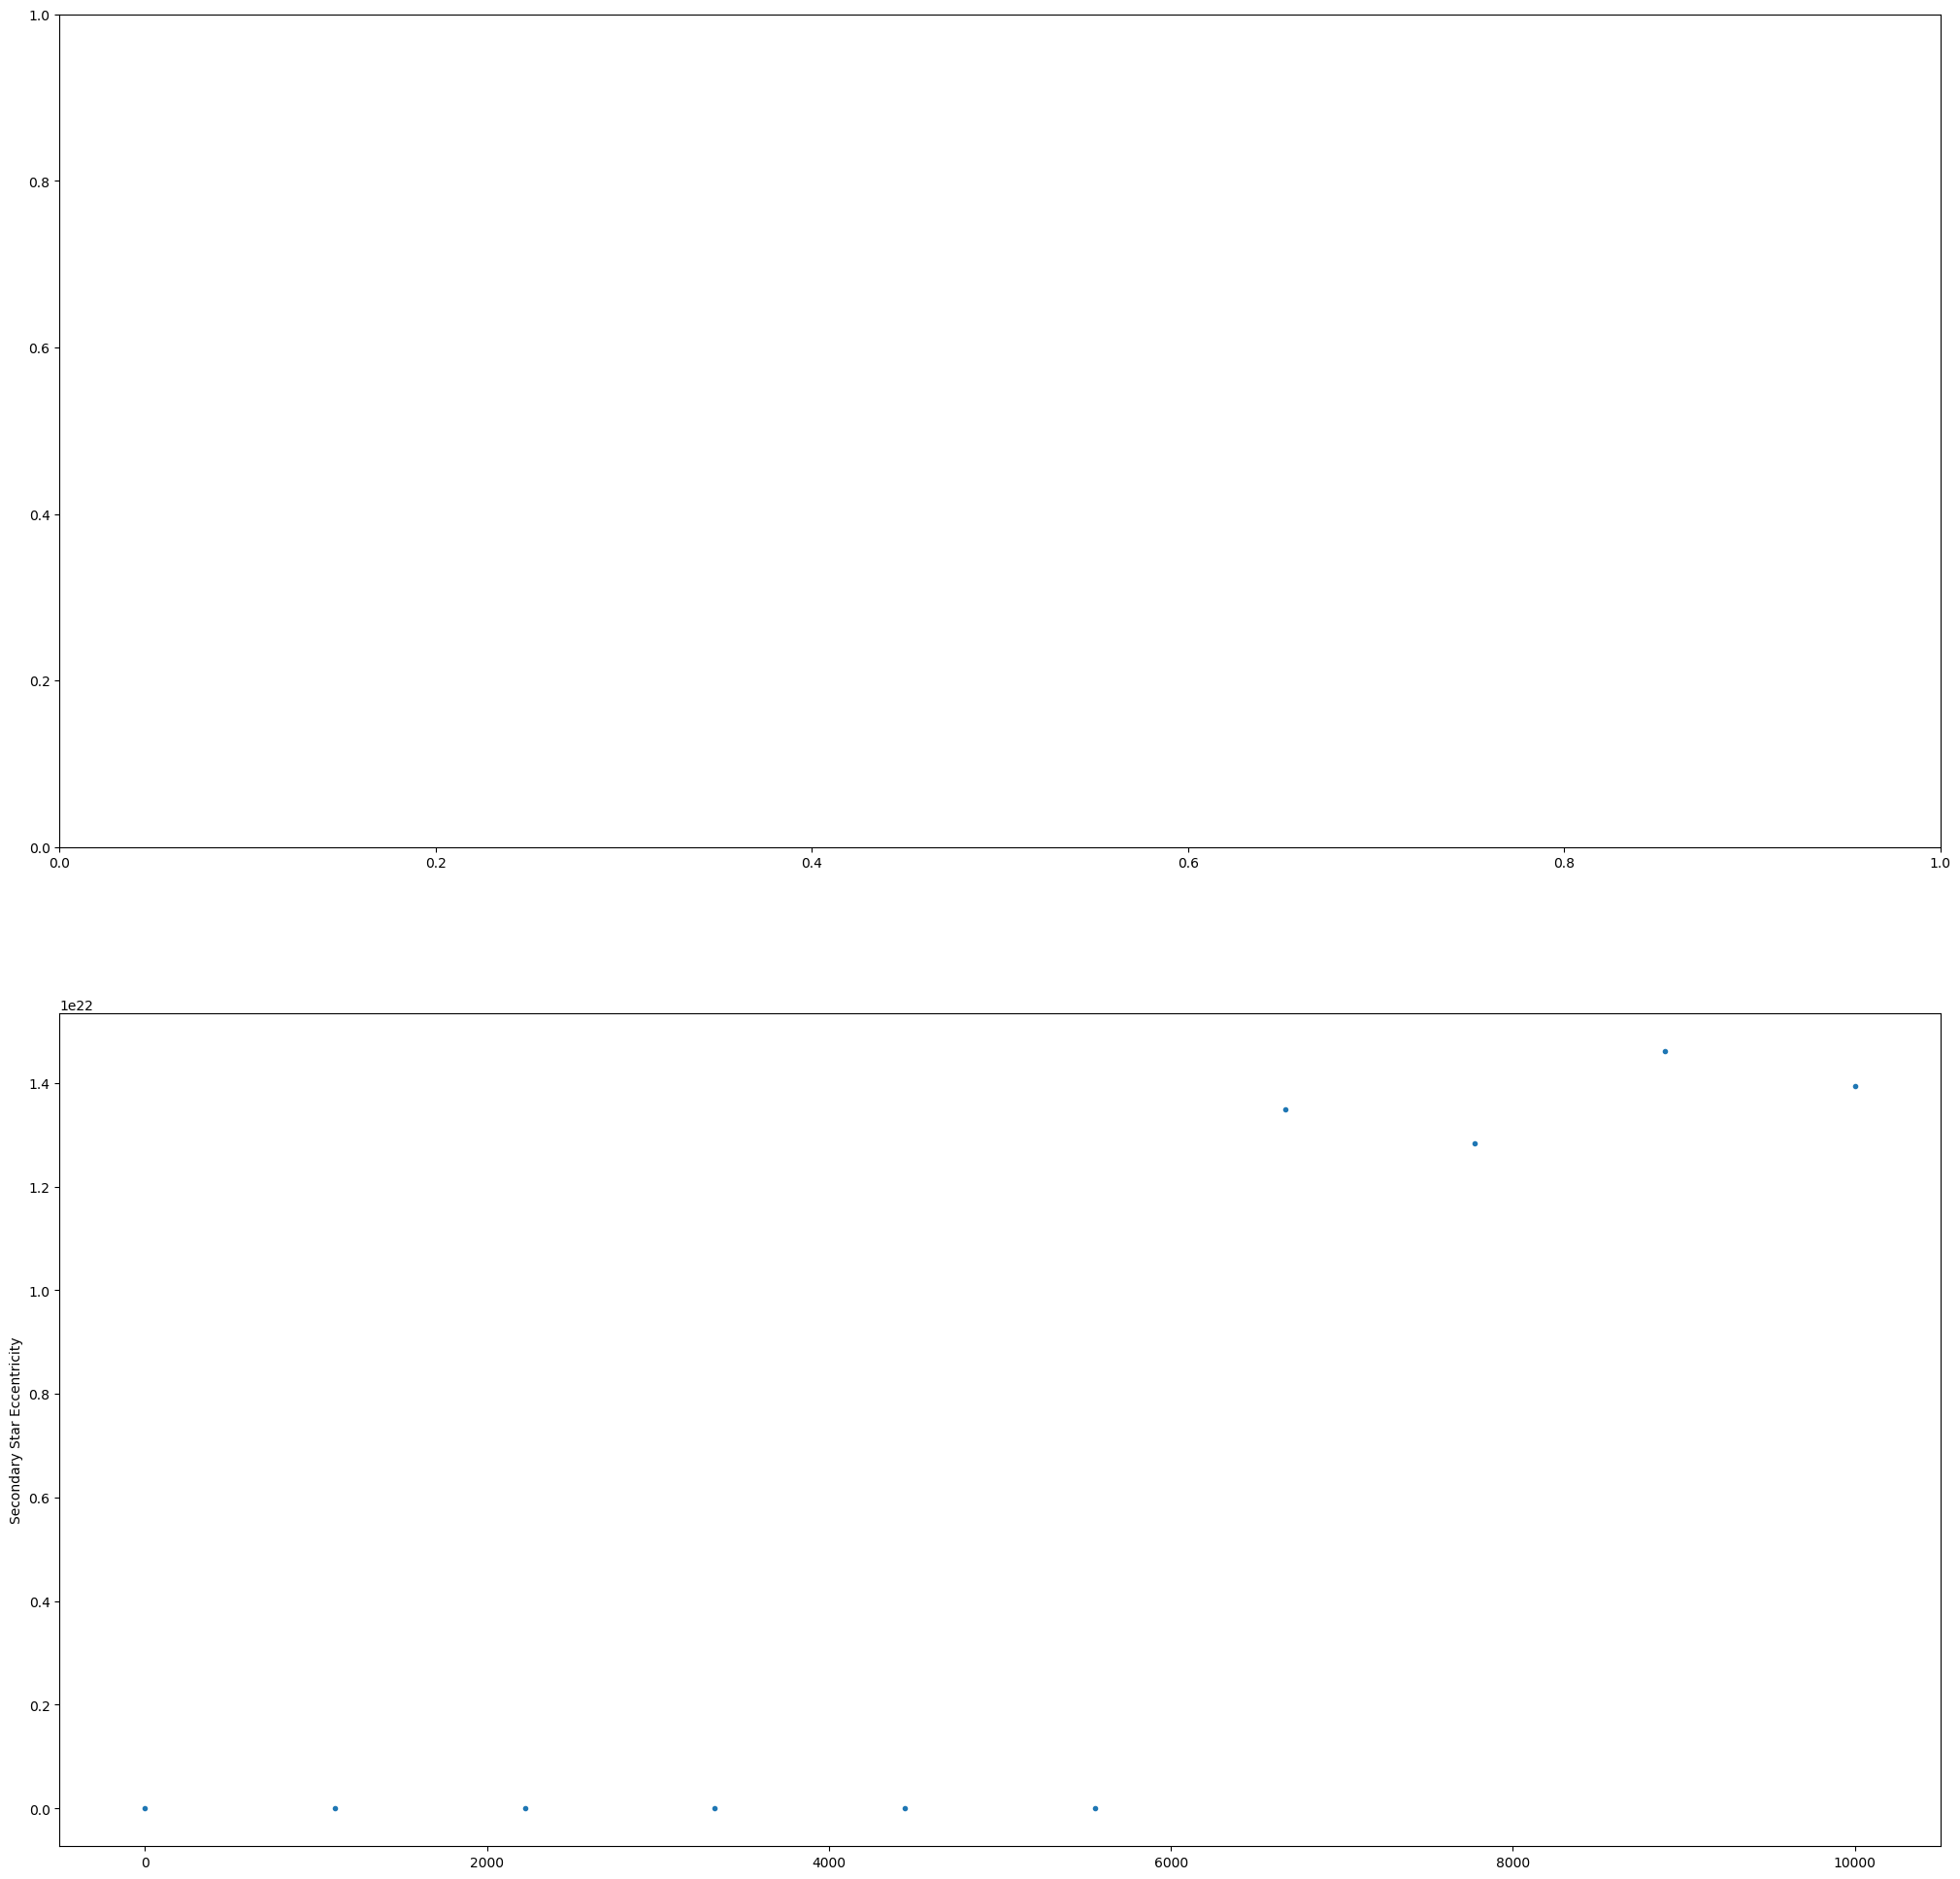

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows = 2,figsize=(25,25), dpi= 100)
# ax[0].plot(times,pomega,'.')
# ax[0].set_ylabel("Pericenter", fontsize=10)
#ax[0].set_xscale('log')

ax[1].plot(times, eccen, '.')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_ylabel('Secondary Star Eccentricity', fontsize=10)

ax[2].plot(times, ab, '.', label = 'ab')
ax[2].plot(times, apred, '--', label = 'predicted ab')
#ax[2].set_xscale('log')
ax[2].set_xlabel('Time', fontsize=24)
ax[2].set_ylabel('Secondary Star Semi-Major Axis', fontsize=10)
ax[2].legend()

#plt.savefig("Pericenter_Eccen_SemiMajAx_time.png")




# TAU FOR LOOP

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# for j,t in enumerate(tau):
#     sim, rebx, tides = setupSimulation(a_b,mu,R1,R2)

#     ps = sim.particles
#     ps[0].params["tctl_k1"] = k2/2.0
#     ps[0].params["tctl_tau"] = t

#     Noutputs = 1000
#     t_max = 1e4
#     times = np.linspace(0, t_max, Noutputs)
#     pomega = np.zeros(Noutputs) # angle from x-axis to pericenter
#     eccen = np.zeros(Noutputs) # binary eccentricity
#     ab = np.zeros(Noutputs)  # binary semi major axis
    
#     #Calculating theoretical semi major axis (Predicted values)
#     q = (ps[1].m/ps[0].m)
#     T = (ps[0].r**3)/(sim.G/ps[0].m/ps[0].params["tctl_tau"])
#     apred = ps[0].r*((ps[1].a/ps[0].r)**8 - (48.*ps[0].params["tctl_k1"]*q*(1+q)*times)/T)**(1./8)
    
#     for i,time in enumerate(times):
#         sim.integrate(time)
#         pomega[i] = ps[1].pomega
#         eccen[i] = ps[1].e
#         ab[i] = ps[1].a
    
#     fig,ax = plt.subplots(nrows = 3,figsize=(12,11), dpi= 100)
    
#     ax[0].title.set_text('For Tau = {0}'.format(t))
#     ax[0].plot(times,pomega,'.')
#     ax[0].set_ylabel("Pericenter", fontsize=10)
#     #ax[0].set_xscale('log')
    
#     ax[1].plot(times, eccen, '.')
#     #ax[1].set_xscale('log')
#     #ax[1].set_yscale('log')
#     ax[1].set_ylabel('Secondary Star Eccentricity', fontsize=10)
    
#     ax[2].plot(times, ab, '.')
#     ax[2].plot(times, apred, '--')
#     #ax[2].set_xscale('log')
#     ax[2].set_xlabel('Time', fontsize=24)
#     ax[2].set_ylabel('Secondary Star Semi-Major Axis', fontsize=10)
#     ax[2].legend(fontsize = 10, loc = 'best')
    
# plt.savefig('For_dif_Tau_val.png')
# plt.show
    

    

    
    

